## EDA for context paragraphs (Train)

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

from afinn import Afinn

In [2]:
file_name_train =  'data/train_context.xlsx'

train_context = pd.read_excel(io=file_name_train)
train_context.head()

,Unnamed: 0,context,contextID
0,0,An Internet service provider (ISP) is an organ...,1
1,0,Internet services typically provided by ISPs i...,2
2,0,The Internet was developed as a network betwee...,3
3,0,"In 1989, the first ISPs were established in Au...",4
4,0,"On 23 April 2014, the U.S. Federal Communicati...",5


In [3]:
train_context = train_context.drop(columns= "Unnamed: 0")

In [4]:
train_context.count()

context      14963
contextID    14963
dtype: int64

### Test Context

In [5]:
file_name_test =  'data/test_context.xlsx'
test_context = pd.read_excel(io=file_name_test)
test_context.head()

,Unnamed: 0,context,contextID
0,0,Pain is a distressing feeling often caused by ...,14964
1,0,Pain is the most common reason for physician c...,14965
2,0,"In 1994, responding to the need for a more use...",14966
3,0,"Pain is usually transitory, lasting only until...",14967
4,0,Nociceptive pain is caused by stimulation of p...,14968


In [6]:
test_context = test_context.drop(columns= "Unnamed: 0")

In [7]:
test_context.count()

context      4072
contextID    4072
dtype: int64

In [8]:
train_context["Length"] = train_context["context"].apply(lambda x : len(x.split()))
test_context["Length"] = test_context["context"].apply(lambda x : len(x.split()))

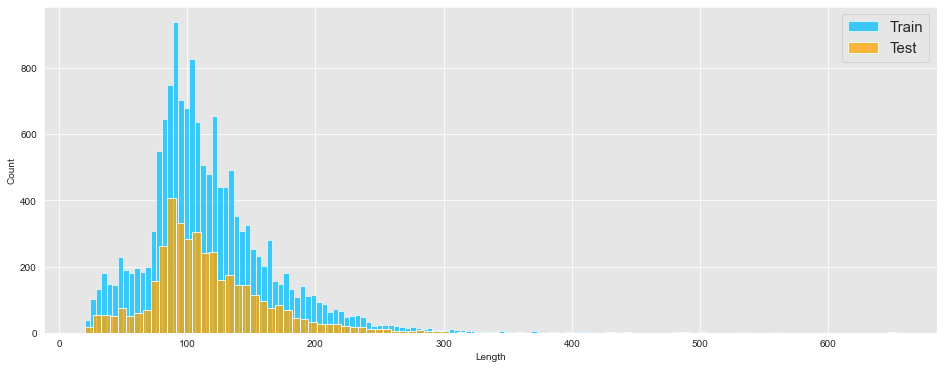

In [10]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(train_context["Length"], stat = "count", color='deepskyblue', label = "Train")
sns.histplot(test_context["Length"], stat = "count", color='Orange', label = "Test")
plt.legend(fontsize = 15)

In [11]:
pd.concat([pd.Series(train_context["Length"].describe(), name= "Train"), pd.Series(test_context["Length"].describe(), name = "Test")],axis = 1)

,Train,Test
count,14963.000000,4072.000000
mean,116.558377,116.685167
std,49.786171,49.247440
min,20.000000,20.000000
25%,86.000000,87.000000
50%,107.000000,107.000000
75%,139.000000,139.000000
max,562.000000,653.000000


### Basic Sentiment Analysis using AFINN

In [13]:
afinn = Afinn()
train_afinn_scores = train_context["context"].apply(lambda x: afinn.score(x))
test_afinn_scores = test_context["context"].apply(lambda x: afinn.score(x))

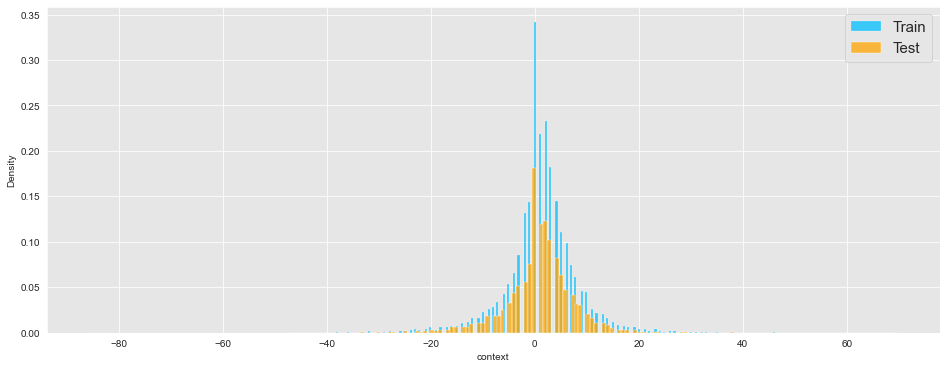

In [14]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(train_afinn_scores, stat = "density", color='deepskyblue', label = "Train")
sns.histplot(test_afinn_scores, stat = "density", color='orange', label = "Test")
plt.legend(fontsize = 15)

### As the data is split randomly to train and test data, the characteristic of both dataset should be similar as shown by the EDA done for the contextual paragraphs, thus for the QnA we will combining the train and test data for EDA

## EDA for Questions and Answers

In [4]:
train_QA = pd.read_excel(io='data/train_QA.xlsx')
test_QA = pd.read_excel(io='data/test_QA.xlsx')

In [5]:
train_QA.head()

,Unnamed: 0,question,id,answers,is_impossible,plausible_answers,contextID
0,0,What does ISP stand for?,56dfb9227aa994140058e079,"[{'text': 'Internet service provider', 'answer...",False,NaN,1
1,1,what does an isp do?,56dfb9227aa994140058e07a,"[{'text': 'provides services for accessing, us...",False,NaN,1
2,2,What forms can an isp be organized in?,56dfb9227aa994140058e07b,"[{'text': 'commercial, community-owned, non-pr...",False,NaN,1
3,3,What are the initials for an Internet service ...,5a10c34906e79900185c33e1,[],True,"[{'text': 'ISP', 'answer_start': 30}]",1
4,4,What kind of service providers are always comm...,5a10c34906e79900185c33e2,[],True,"[{'text': 'Internet', 'answer_start': 113}]",1


In [6]:
train_QA = train_QA.drop(columns = "Unnamed: 0" )
test_QA = test_QA.drop(columns = "Unnamed: 0" )

In [44]:
merge = [train_QA , test_QA]
df = pd.concat(merge)

### Question Length

In [7]:
df["Length"] = df["question"].apply(lambda x : len(x.split()))

Text(0.5, 0, 'Length of Question (WordCount)')

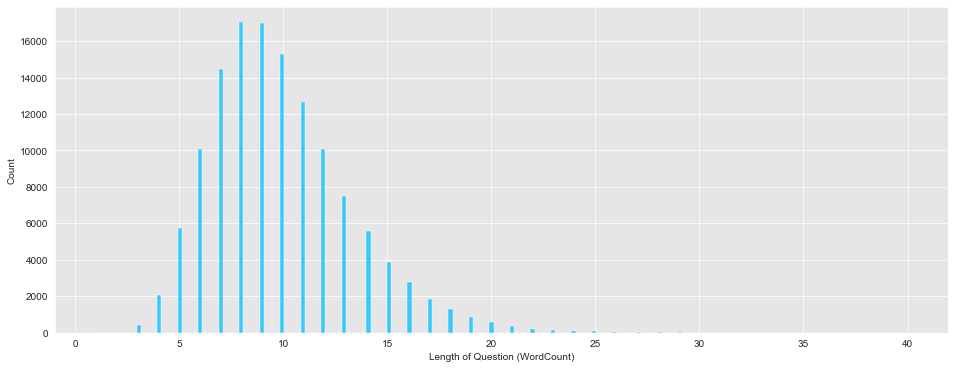

In [149]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(df["Length"], stat = "count", color='deepskyblue', label = "Train")
plt.xlabel('Length of Question (WordCount)')

In [48]:
df["Length"].describe()

count    130319.000000
mean          9.893822
std           3.418829
min           1.000000
25%           7.000000
50%           9.000000
75%          12.000000
max          40.000000
Name: Length, dtype: float64

### Ratio between "Possible" answers and "Impossible" answers

Text(0.5, 1.0, 'Proportion of Answers')

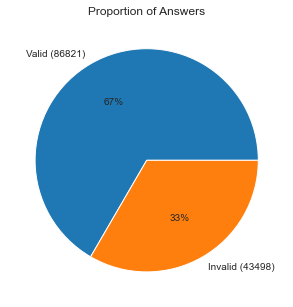

In [51]:
df_impossible = len(df[df['is_impossible']])
df_possible = len(df) - df_impossible

sizes = [(df_possible) , (df_impossible)]

plt.figure(figsize=(5, 8))
plt.pie(sizes, autopct='%1.0f%%' , labels= ["Valid ({0})".format(df_possible),"Invalid ({0})".format(df_impossible)])
plt.title("Proportion of Answers")

### Length of Answers

In [142]:
def extractAnsLength(x):
    x = ast.literal_eval(x)
    return len(x[0]['text'].split())

In [143]:
answersLength = df.apply(axis=1, 
    func = (lambda x: extractAnsLength(x['plausible_answers']) if x['is_impossible'] else extractAnsLength(x["answers"])))

Text(0, 0.5, 'Number of Answers')

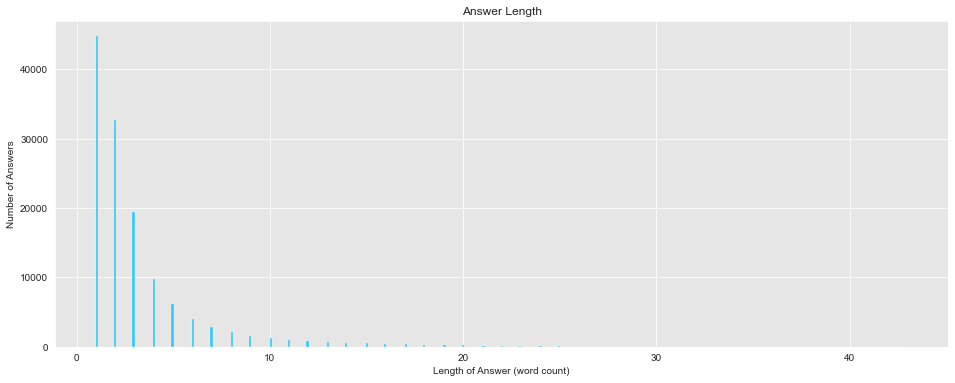

In [150]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(answersLength, stat = "count", color='deepskyblue')
plt.title("Answer Length")
plt.xlabel("Length of Answer (word count)")
plt.ylabel("Number of Answers")